<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *AIB / SECTION 2 / SPRINT 1 / NOTE 2*

# 📝 Assignment
---

# 다중선형회귀(Multiple Linear Regression)

이번 과제에서도 n211 과제 에서 다루었던 housing price dataset을 가지고 배운 내용을 연습해 보겠습니다.
다음 링크에서 다운로드 받아 사용해 주세요. [House Sales in King County, USA](https://www.kaggle.com/harlfoxem/housesalesprediction)

In [2]:
# 데이터는 캐글에서 받으셔도 되고 이 링크에서 불러와도 됩니다.
import pandas as pd

df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/kc_house_data/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [3]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

### 1) 데이터는 May 2014 ~ May 2015 의 2년치 데이터입니다. 2015-01-01 부터 큰 날짜의 데이터는 테스트, 그 이외의 데이터는 훈련 데이터셋으로 나누어 주세요
- **(Urclass Quiz) 훈련데이터 샘플의 갯수를 제출하세요.**

In [4]:
#date를 기준(시계열 데이터)으로 train/test 데이터를 나눴으니 따로 샘플링을 진행하지 않아도 괜찮다.
df1 = df.sort_values(by='date').reset_index().iloc[:,1:]
test = df1[df1['date']>'20150101T000000']
train = df1[df1['date']<'20150101T000000']
print(train.shape)
print(test.shape)

(14633, 21)
(6980, 21)


### 2) 두 특성(bathrooms, sqft_living)을 사용해서 다중선형회귀 모델을 만들어 보세요
- 학습시 Parameters는 모두 기본값으로 합니다.
- 정규화(normalize) 등 추가적인 데이터처리 없이 진행합니다.
- **(Urclass Quiz) 테스트세트의 MAE 값을 제출하세요.(소수점 이하 반올림)**

In [5]:
#다중선형회귀모델
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings(action='ignore')

feature = ['bathrooms', 'sqft_living']
target = 'price'

X_train = train[feature]
X_test = test[feature]

y_train = train[target]
y_test = test[target]

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style

In [7]:
#훈련 모델 적용
model = LinearRegression()
model.fit(X_train, y_train.values) #X_train값 2개의 피쳐와 y_train price, 각각의 샘플을 넣는다.
y_pred_train = model.predict(X_train)
mae3 = mean_absolute_error(y_train, y_pred_train)

print(f'훈련 에러: {mae3:.0f}')

훈련 에러: 170777


In [8]:
#테스트 모델 적용
y_pred_test = model.predict(X_test)
mae4 = mean_absolute_error(y_test, y_pred_test)

print(f'훈련 에러: {mae4:.0f}')

훈련 에러: 179253


### 3) 모델의 회귀계수(coefficients)와 절편(intercept)을 확인해 보세요.
- **(Urclass Quiz) sqft_living의 회귀계수를 제출하세요.(소수점 이하 반올림)**

In [9]:
#기울기와 회귀계수
b0 = model.intercept_
b1, b2 = model.coef_

print(f'y= {b0: .0f} + {b1: .0f}x\u2081 + {b2: .0f}x\u2082')
print(f'y= {b0: .0f}')
#b0은 y절편, b1, b2는 회귀계수, 처음 feature 생성시에 sqft_living이 뒤에 있었으니까 sqft_living's coefficients = 286

y= -50244 + -5159x₁ +  286x₂
y= -50244


In [10]:
#가상의 데이터 삽입. 이때, 회귀계수 b1의 감소폭이 크므로 적당히 조정해도 괜찮음 
#b2의 감소폭은 작으므로 비율에 맞춰서 진행하겠다.

print(model.predict([[20, 2000]]))
print(model.predict([[10, 2000]]))
print(model.predict([[20, 1500]]))
print(model.predict([[10, 1500]]))

[418852.99002095]
[470442.24916204]
[275784.22224606]
[327373.48138716]


### 4) MSE, MAE, RMSE, $R^2$ 를 훈련/테스트 데이터에 대해 확인해 보세요
- **(Urclass Quiz) 테스트 데이터에 대한 MSE, MAE, RMSE, $R^2$ 값을 올바르게 적은 보기를 고르세요.(소수점 두자리수 이하 반올림)**

In [11]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#MSE
MSE = mean_squared_error(y_test, y_pred_test)

#MAE
MAE = mean_absolute_error(y_test, y_pred_test)

#RMSE
RMSE = MSE ** 0.5

#R-squared
R_squared = r2_score(y_test, y_pred_test)

print(f'MSE는 : {MSE: .1f}')
print(f'MAE는 : {MAE: .1f}')
print(f'RMSE는 : {RMSE: .1f}')
print(f'Rsquared는 : {R_squared: .1f}')

MSE는 :  71083994178.8
MAE는 :  179252.5
RMSE는 :  266615.8
Rsquared는 :  0.5


# OLS를 이용한 다중선형회귀

In [17]:
import statsmodels.api as sm
import pandas as pd

df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/kc_house_data/kc_house_data.csv')
df['intercept'] = 1

#train / test 로 나눠줌. sklearn

from sklearn.model_selection import train_test_split

feature = ['bathrooms', 'sqft_living']
target = ['price']

train_data = df[feature]
target_data = df[target]

x_train, x_test, y_train, y_test = train_test_split(train_data, target_data, test_size=0.32) #0.32 비율로 쪼갬

In [33]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(x_train, y_train)

print('train set score:', model.score(x_train, y_train))
print('train set score:', model.score(x_test, y_test))

b0 = model.intercept_[0]
b1 = model.coef_[0][0]
b2 = model.coef_[0][1]

print(f'y={b0:.0f} + {b1:.0f}x\u2081 + {b2:.0f}x\u2082')

train set score: 0.4871612448675614
train set score: 0.5035460350103254
y=-35125 + -131x₁ + 277x₂


## 🔥도전과제(Github - Discussion)

### 공지로 안내드리는 Github - Discussion 페이지에 올려 보세요:)

### 5)  EDA를 진행하시고, 두개 이상의 특성을 선택하여 특성공학(feature engineering)을 진행한 후 아래의 질문들에 대한 본인만의 리포트를 작성해보시고 서로 논해 보세요. 
- 어떤 이유에서 해당 특성공학을 진행하셨나요? 특성공학을 통해 기대하는 효과는 무엇이었나요? 만약 얻고자 하는 효과를 얻지 못했다면 이유는 무엇이며 어떤 액션을 추가할 수 있을까요? 
- 특성공학을 거친 특성을 포함해 다수의 특성을 사용한 모델을 학습하고 테스트 데이터에 대해 MSE, RMSE, MAE, R2 스코어는 어떠한가요? 해당 결과를 통해 얻을 수 있는 인사이트는 어떤 것이 있었나요? 
- 만들어진 회귀계수를 사용해 모델을 설명해 본다면? 
- 만들어진 모델은 과소적합인가요? 과대적합인가요? 일반화가 잘 된 모델을 만들기 위해 추가로 할 수 있는 액션은 어떤 것이 있을까요? 

※kaggle notebook에서도 힌트를 얻어 보세요. 

In [15]:
#우선 데이터를 불러온다.
import pandas as pd

df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/kc_house_data/kc_house_data.csv')#date를 기준(시계열 데이터)으로 train/test 데이터를 나눴으니 따로 샘플링을 진행하지 않아도 괜찮다.
df1 = df.sort_values(by='date').reset_index().iloc[:,1:]
test = df1[df1['date']>'20150101T000000']
train = df1[df1['date']<'20150101T000000']
print(train.shape)
print(test.shape)

(14633, 21)
(6980, 21)


In [ ]:
df.info() #info를 확인해보니, date를 제외하고 모든 데이터가 int / float형 인것을 확인.
df.isnull().sum() #결측치 없음.

In [13]:
df = df.drop(['id'], axis=1) #이후 id 데이터는 사용할 것 같지 않아 제외

In [14]:
#date를 기준(시계열 데이터)으로 train/test 데이터를 나눴으니 따로 샘플링을 진행하지 않아도 괜찮다.
df1 = df.sort_values(by='date').reset_index().iloc[:,1:]
test = df1[df1['date']>'20150101T000000']
train = df1[df1['date']<'20150101T000000']
print(train.shape)
print(test.shape)

(14633, 20)
(6980, 20)


In [15]:
#이후, 데이터는 아래의 feature 4가지만 사용
df1 = df[['bedrooms', 'price', 'sqft_living', 'bathrooms']]

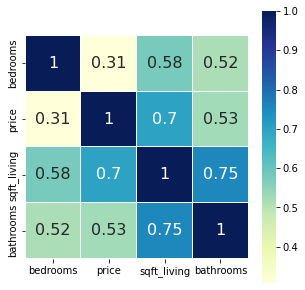

In [16]:
#상관관계 Heat-map
import seaborn as sns

colormap = plt.cm.YlGnBu #컬러
plt.figure(figsize=(5, 5)) #사이즈
sns.heatmap(df1.corr(), linewidths = 0.1, vmax = 1.0, square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16}) 
plt.show()

In [17]:
#pairplot
#sns.pairplot(df, palette = "husl")

우선, 변수가 하나인 단순선형회귀모델부터 세운다.

이때, 기준모델 y는 'price'이고, 대상은 bathrooms이다.

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings(action='ignore')

feature = ['bathrooms']
target = 'price'

X_train_one = train[feature]
X_test_one = test[feature]

y_train_one = train[target]
y_test_one = test[target]

model.fit(X_train_one.values, y_train_one)

LinearRegression()

In [21]:
y_predict = model.predict(X_test_one)
y_predict

array([633560.81635827, 887886.78362878, 633560.81635827, ...,
       506397.83272302, 442816.3409054 , 569979.32454065])

In [30]:
#기울기와 회귀계수
b0 = model.intercept_
b1 = model.coef_

print(b0, b1)

-2254.1018179764505 [254325.9672705]


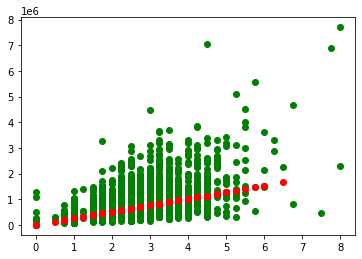

In [25]:
plt.scatter(X_train_one, y_train_one, color='green') #train data에 대한 그래프 
plt.scatter(X_test_one, y_predict, color='red') #train 데이터 예측을 빨간색 점
plt.show()

In [37]:
#다항으로 진행

feature = ['bathrooms', 'sqft_living', 'bathrooms']

X_train = train[feature]
X_test = test[feature]

y_train = train[target]
y_test = test[target]

model.fit(X_train.values, y_train)

y_predict1 = model.predict(X_test)
y_predict1

array([ 494827.31674037,  724301.16997707,  474797.68925189, ...,
        474515.77685344,  338459.49126808, 1011164.61220848])

In [45]:
b0 = model.intercept_
b1, b2, b3 = model.coef_

print(f'y= {b0: .0f} + {b1: .0f}x\u2081 + {b2: .0f}x\u2082 + {b3: .0f}x\u2083')

y= -50244 + -2579x₁ +  286x₂ + -2579x₃


## 참고자료
* [Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering)
* ["A Few Useful Things to Know about Machine Learning"](https://homes.cs.washington.edu/~pedrod/papers/cacm12.pdf)
* [Machine Learning and AI via Brain simulations](https://forum.stanford.edu/events/2011/2011slides/plenary/2011plenaryNg.pdf)
* [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf),  Chapter 3.1, Simple Linear Regression, & Chapter 3.2, Multiple Linear Regression
* [Brandon Foltz, Statistics 101: Simple Linear Regression](https://www.youtube.com/watch?v=ZkjP5RJLQF4)